In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [73]:

data = pd.read_csv('S:/varun/hackathon/final.csv')


In [74]:

data.head()


,Year,Land(%),Rice prod,wheat prod,Rice imp,wheat imp,cereal prod,people drinking water,Undernourishment,Stocks(MT),...,Food bal(rice),Food bal(wheat),Food bal(cereals),Food bal(pulses),PCI GDP(Rs),Stocks(MT).1,MSP(wheat),MSP(Paddy),Wheat(imp),per cap food supply var
0,2001,60.704832,139900000,69680896,63,1351.0,242963796,80.9,19.4,414.57,...,74648926.41,65904575.57,215,7857088.01,23095,414.57,620,530,1351.0,20
1,2002,60.729385,107730304,72766304,872,39150.0,206636708,81.4,21.0,414.57,...,74278224.97,66781235.11,962,8841138.75,23607,414.57,620,530,39150.0,23
2,2003,60.624783,132789000,65760800,339,35097.0,236592700,81.9,22.2,414.57,...,74285575.40,64001624.10,598,6981938.97,25116,414.57,630,550,35097.0,43
3,2004,60.667162,124697104,72156200,0,101075.0,229845504,82.4,22.8,414.57,...,77792821.64,64343903.28,249,8436716.54,26629,414.57,640,560,101075.0,51
4,2005,60.583414,137690096,68636896,256,37760.0,239997492,82.9,22.2,214.56,...,80671503.01,62211281.70,250,8058968.63,28639,214.56,700,570,37760.0,49


In [75]:

drop = ['quality','people drinking water','wheat imp','Undernourishment','Food bal(cereals)','Wheat(imp)','Rice imp','Stocks(MT)','MSP/100Kg(Wheat)','Food bal(rice)','Food bal(wheat)','wheat prod','Pop density']
data.drop(drop , inplace = True , axis = 1)        


In [76]:

data.isnull().any()


Year                          False
Land(%)                       False
Rice prod                     False
cereal prod                   False
availability(g/capita/day)    False
cal per cap                   False
Annual rainfall               False
per cap food prodn            False
Food bal(pulses)              False
PCI GDP(Rs)                   False
Stocks(MT).1                  False
MSP(wheat)                    False
MSP(Paddy)                    False
per cap food supply var       False
dtype: bool

In [77]:
data


,Year,Land(%),Rice prod,cereal prod,availability(g/capita/day),cal per cap,Annual rainfall,per cap food prodn,Food bal(pulses),PCI GDP(Rs),Stocks(MT).1,MSP(wheat),MSP(Paddy),per cap food supply var
0,2001,60.704832,139900000,242963796,45,2333,1105.2,1.9,7857088.01,23095,414.57,620,530,20
1,2002,60.729385,107730304,206636708,45,2285,981.9,1.9,8841138.75,23607,414.57,620,530,23
2,2003,60.624783,132789000,236592700,45,2282,1243.6,7.3,6981938.97,25116,414.57,630,550,43
3,2004,60.667162,124697104,229845504,45,2256,1080.5,7.2,8436716.54,26629,414.57,640,560,51
4,2005,60.583414,137690096,239997492,46,2270,1208.3,6.5,8058968.63,28639,214.56,700,570,49
5,2006,60.509419,139136992,242785588,47,2334,1161.6,5.9,8488563.06,30805,184.09,850,620,30
6,2007,60.413226,144570000,260485904,49,2400,1179.3,4.6,8960576.75,33446,200.40,1000,745,25
7,2008,60.459305,148036000,266835300,49,2427,1118.0,5.9,9093246.75,33987,293.19,1080,900,48
8,2009,60.563906,135672992,250783392,50,2415,953.7,6.9,9906155.50,36249,544.40,1100,1000,60
9,2010,60.397418,143963008,267838308,51,2442,1215.5,5.6,9800336.30,39270,515.60,1170,1000,49


In [79]:

x = data.iloc[:,0:13].values
y = data.iloc[:,13].values


In [80]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


In [81]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:

ypred =regressor.predict(x_test)

In [83]:

x_test.shape

(4, 13)

In [84]:

ypred

array([20.10377974, 26.95382704, 54.56364526, 36.81937596])

In [89]:

ypred1 = regressor.predict([[2000,60.70483218,139900000,242963796,45,2333,1105.2,1.9,7857088.01,23095,414.57,620,530]])


In [91]:

print(ypred1)


[17.94816318]


In [90]:

from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.8084844252767391

In [86]:
import seaborn as sns

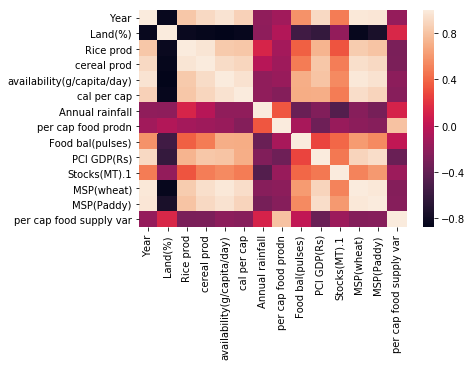

In [87]:
sns.heatmap(data.corr())

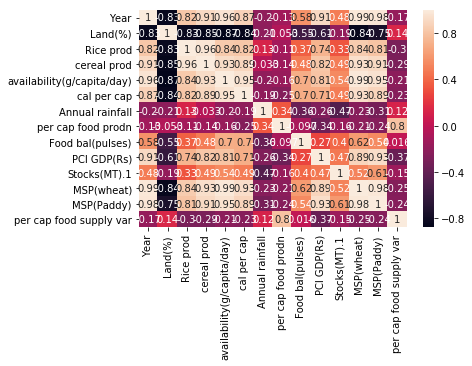

In [88]:
sns.heatmap(data.corr(),annot = True)